# K-Nearest Neighbors (Breast Cancer Condition Prediction)

## Explanation

### Objective

Create a machine learning model that can predict whether a breast cancer data characteristic is Malignant or Benign, using the KNN (K-Nearest Neighbors) algorithm.

### Column Descriptions

- ***id*** = Unique identification number for each patient sample
- ***diagnosis*** = Type of cancer diagnosis (Malignant & Benign)
- ***radius_mean*** = Average distance from the center to the outer border of the cell (radius size)
- ***texture_mean*** = Variation in texture intensity scale on the cell
- ***perimeter_mean*** = Average cell perimeter
- ***area_mean*** = Average cell surface area
- ***smoothness_mean*** = Average variation in cell edge length
- ***compactness_mean*** = Average relationship between perimeter and cell area
- ***concavity_mean*** = Degree of concavity in the cell contour
- ***concavepoints_mean*** = Number of concave points in the cell contour
- ***symmetry_mean*** = Average degree of cell symmetry
- ***fractal_dimension_mean*** = Complexity of the cell contour border
- ***radius_se*** = Standard deviation of radius size
- ***texture_se*** = Standard deviation of texture variation
- ***perimeter_se*** = Standard deviation of cell perimeter
- ***area_se*** = Standard deviation of cell surface area
- ***smoothness_se*** = Standard deviation of edge length variation
- ***compactness_se*** = Standard deviation between cell perimeter and area
- ***concavity_se*** = Standard deviation of the degree of concavity of the cell contour
- ***concavepoints_se*** = Standard deviation of the number of concave points of the cell
- ***symmetry_se*** = Standard deviation of the degree of symmetry of the cell
- ***fractal_dimension_se*** = Standard deviation of the complexity of the cell contour border
- ***radius_worst*** = Maximum radius size value
- ***texture_worst*** = Maximum texture variation value
- ***perimeter_worst*** = Maximum perimeter value
- ***area_worst*** = Maximum surface area value
- ***smoothness_worst*** = Maximum edge length variation value
- ***compactness_worst*** = Maximum value of the relationship between perimeter and area
- ***concavity_worst*** = Maximum contour concavity value
- ***concavepoints_worst*** = Maximum number of concave points of the cell
- ***symmetry_worst*** = Maximum symmetry value of the cell
- ***fractal_dimension_worst*** = Maximum border complexity cell contour

## A. Data Preparation

### A.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [2]:
try:
    df = pd.read_csv("breast-cancer.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [3]:
df.shape

(569, 32)

### A.4 Viewing Data Informations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### A.5 Viewing Top 5 Data and Bottom 5 Data

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### A.6 Viewing Data Statistics

In [7]:
df.describe().T.style.format("{:.4f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
id,569.0000,30371831.4323,125020585.6122,8670.0000,869218.0000,906024.0000,8813129.0000,911320502.0000
radius_mean,569.0000,14.1273,3.5240,6.9810,11.7000,13.3700,15.7800,28.1100
texture_mean,569.0000,19.2896,4.3010,9.7100,16.1700,18.8400,21.8000,39.2800
perimeter_mean,569.0000,91.9690,24.2990,43.7900,75.1700,86.2400,104.1000,188.5000
area_mean,569.0000,654.8891,351.9141,143.5000,420.3000,551.1000,782.7000,2501.0000
smoothness_mean,569.0000,0.0964,0.0141,0.0526,0.0864,0.0959,0.1053,0.1634
compactness_mean,569.0000,0.1043,0.0528,0.0194,0.0649,0.0926,0.1304,0.3454
concavity_mean,569.0000,0.0888,0.0797,0.0000,0.0296,0.0615,0.1307,0.4268
concave points_mean,569.0000,0.0489,0.0388,0.0000,0.0203,0.0335,0.0740,0.2012
symmetry_mean,569.0000,0.1812,0.0274,0.1060,0.1619,0.1792,0.1957,0.3040


### A.7 Viewing Duplicated Data

In [8]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [9]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### A.9 Viewing Outlier Data

C:\Users\nahls\AppData\Local\Temp\ipykernel_16396\854080354.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(16, 8))


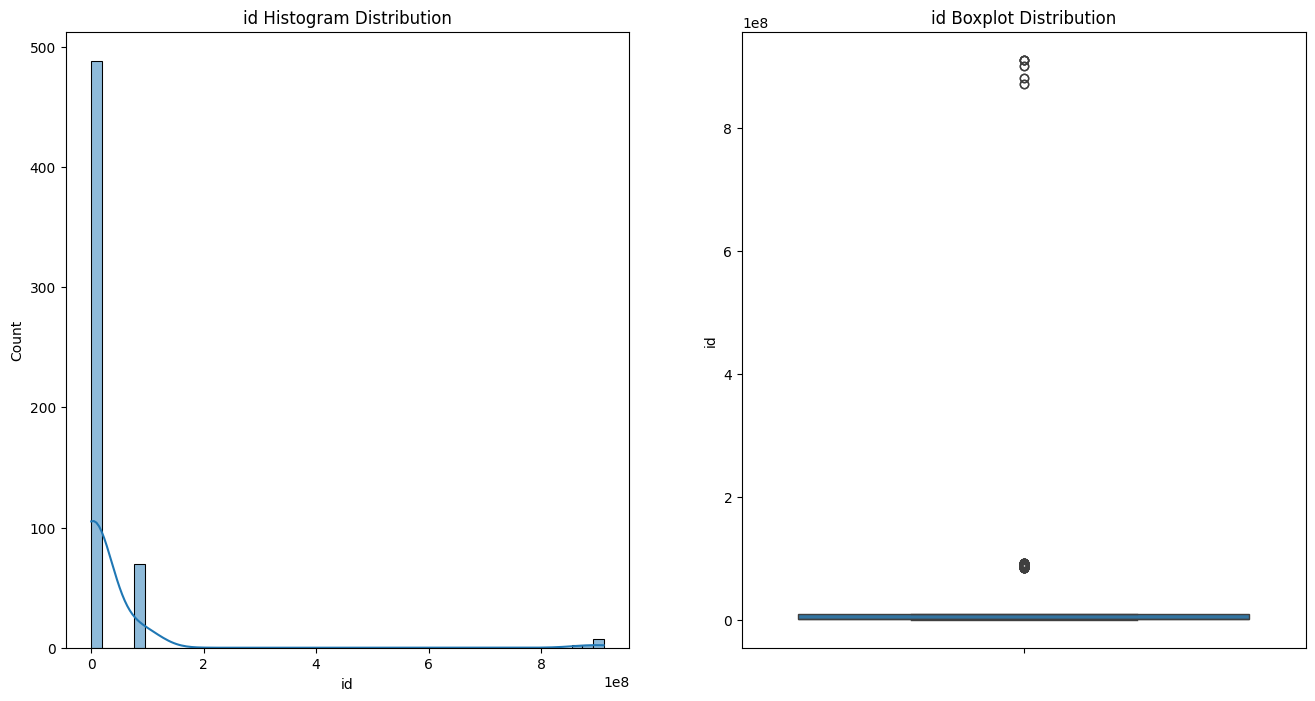

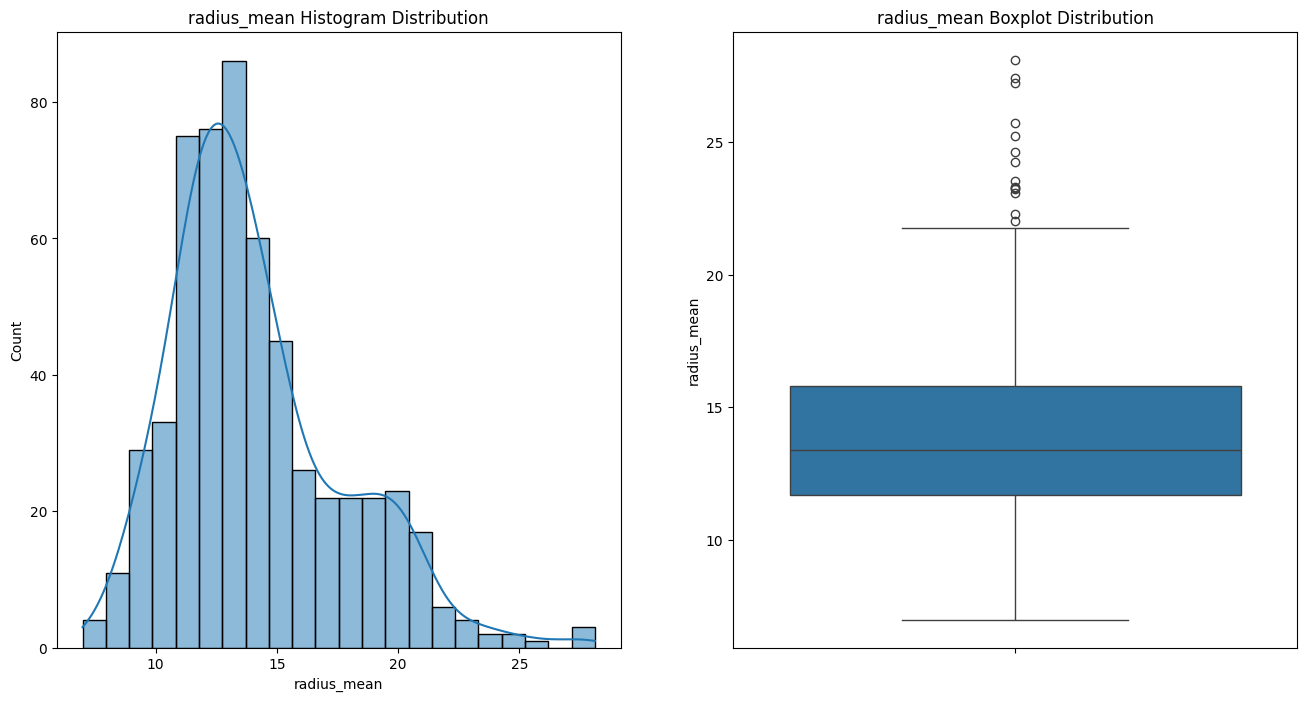

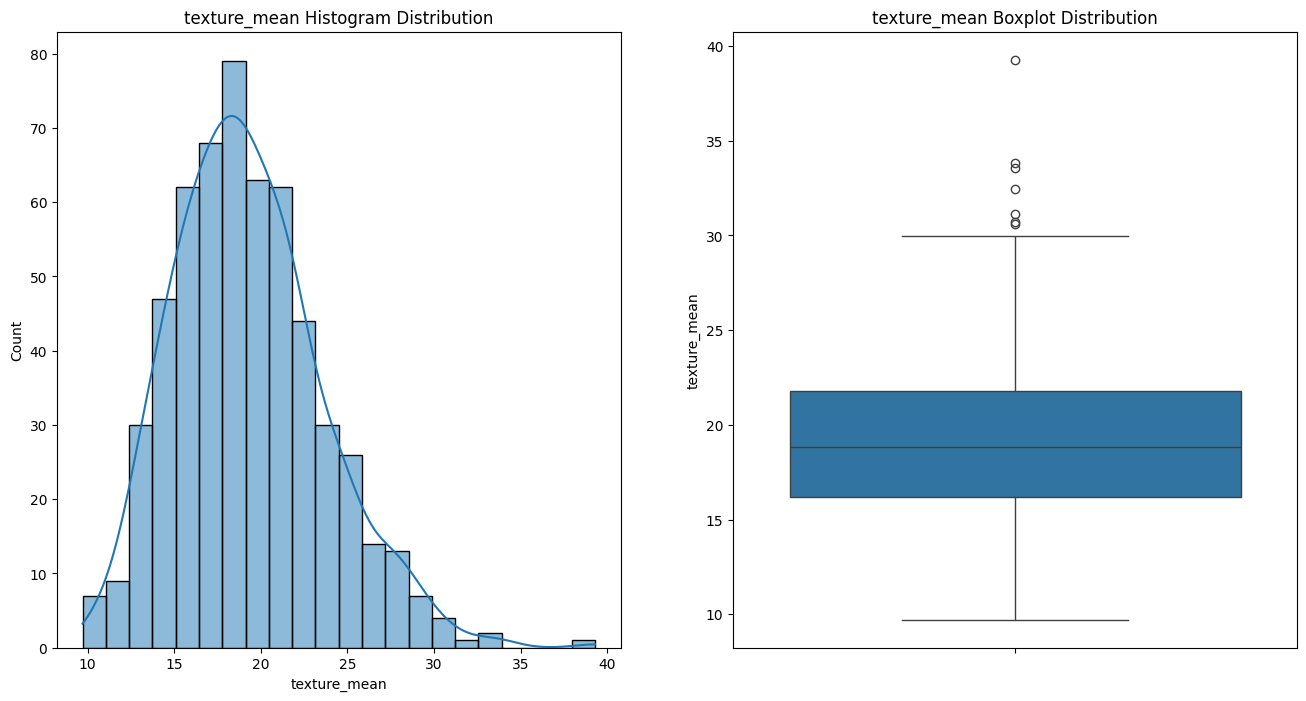

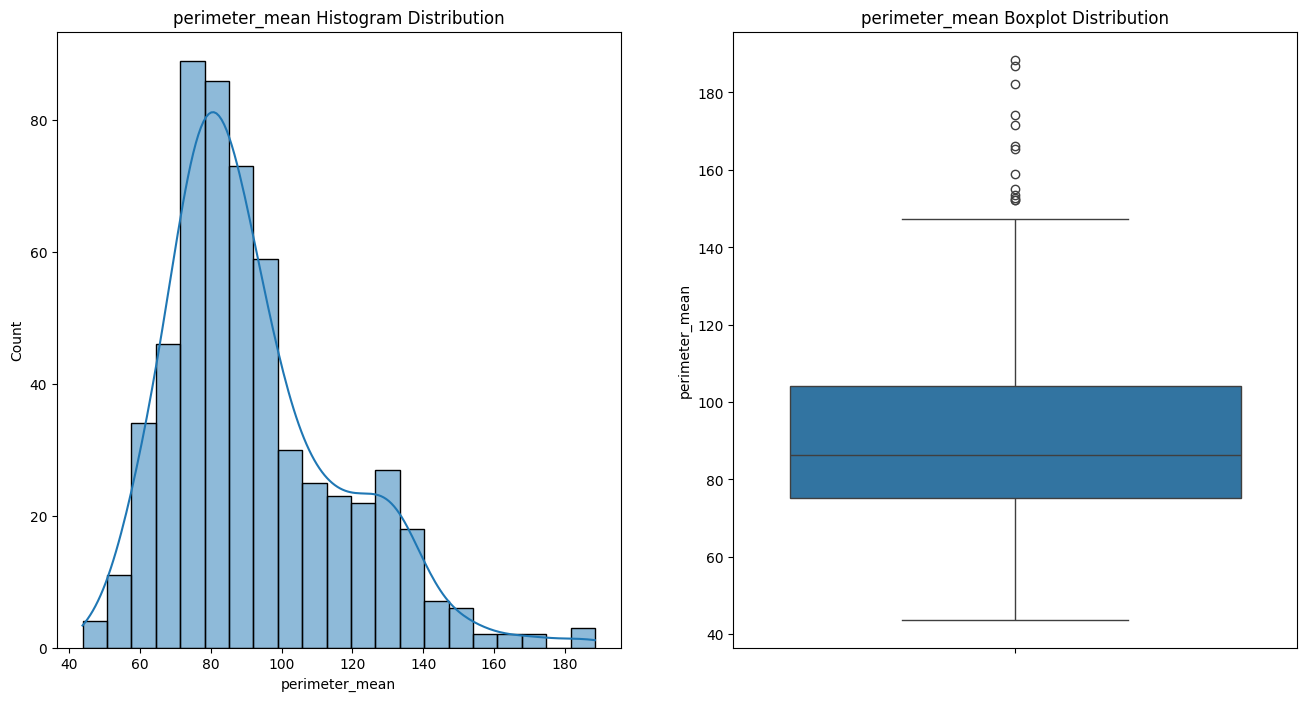

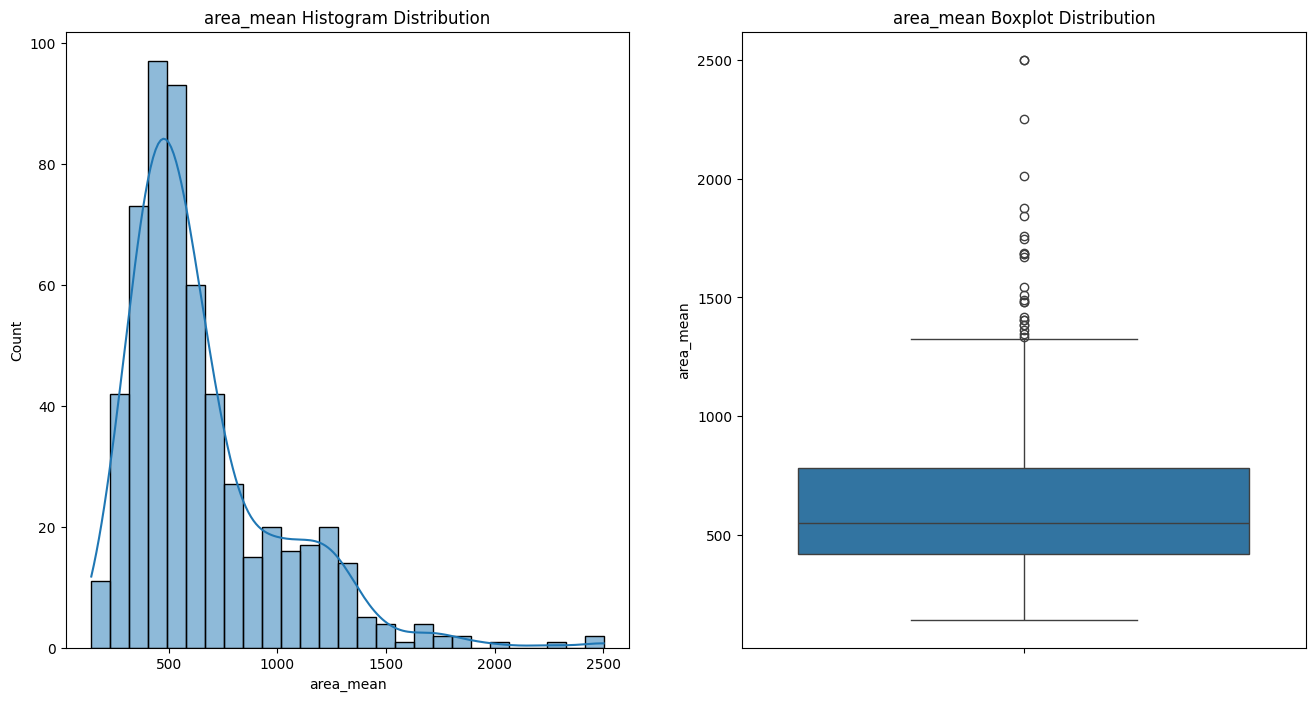

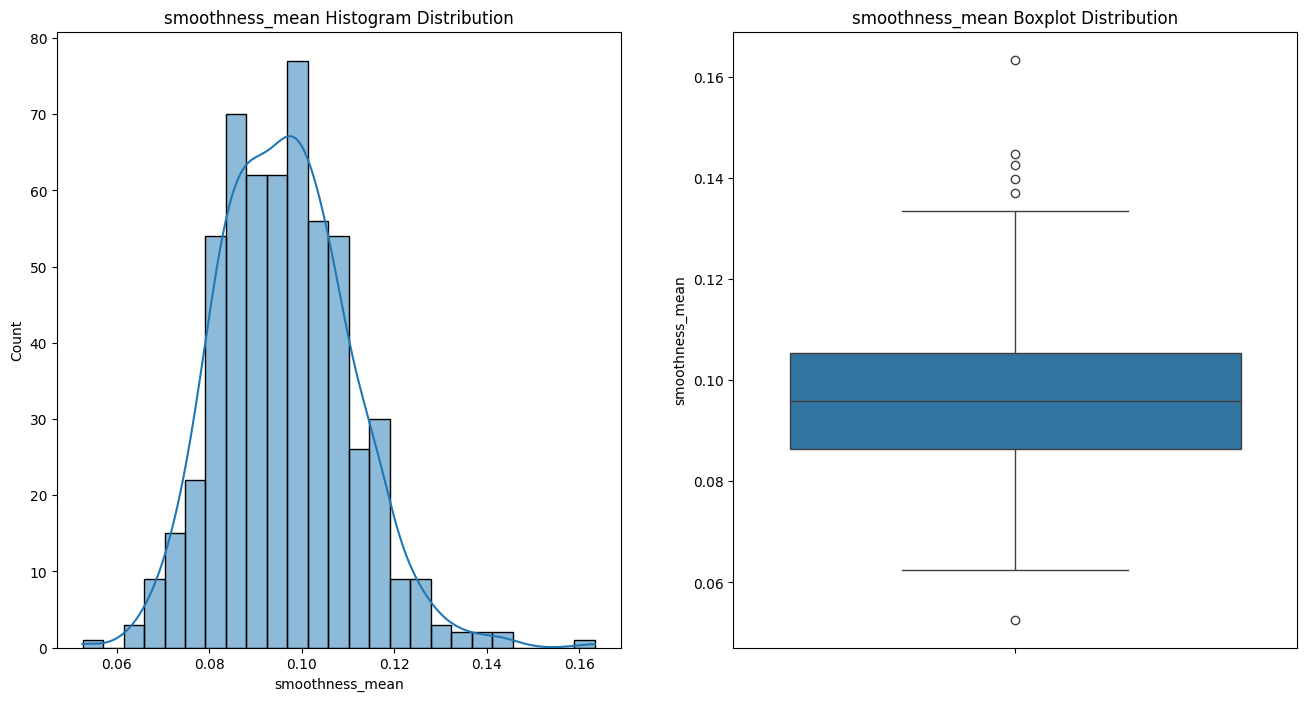

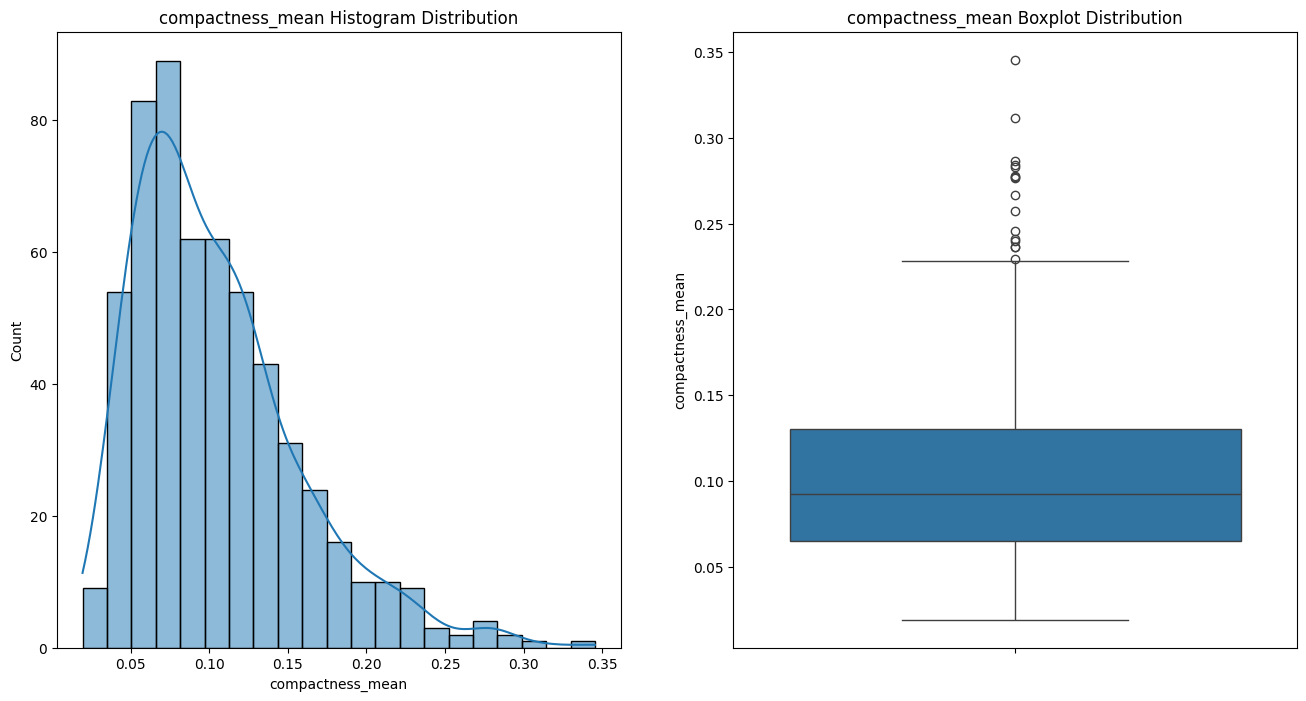

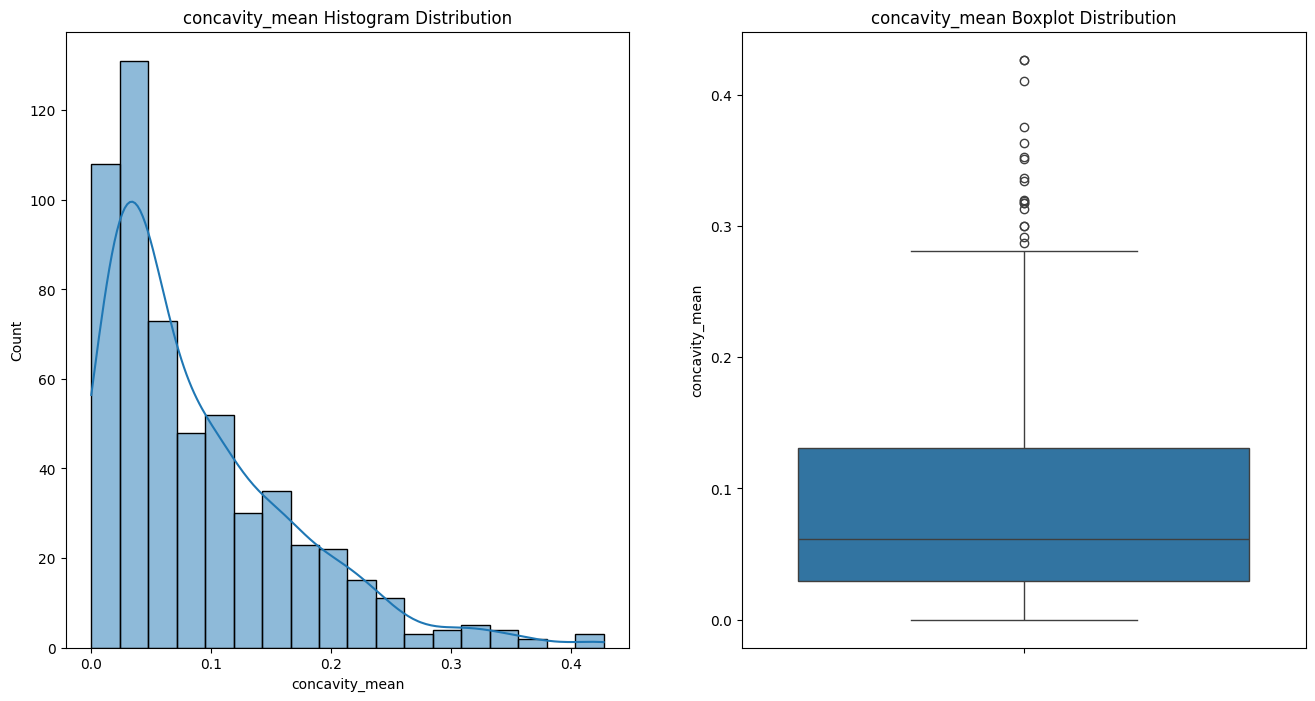

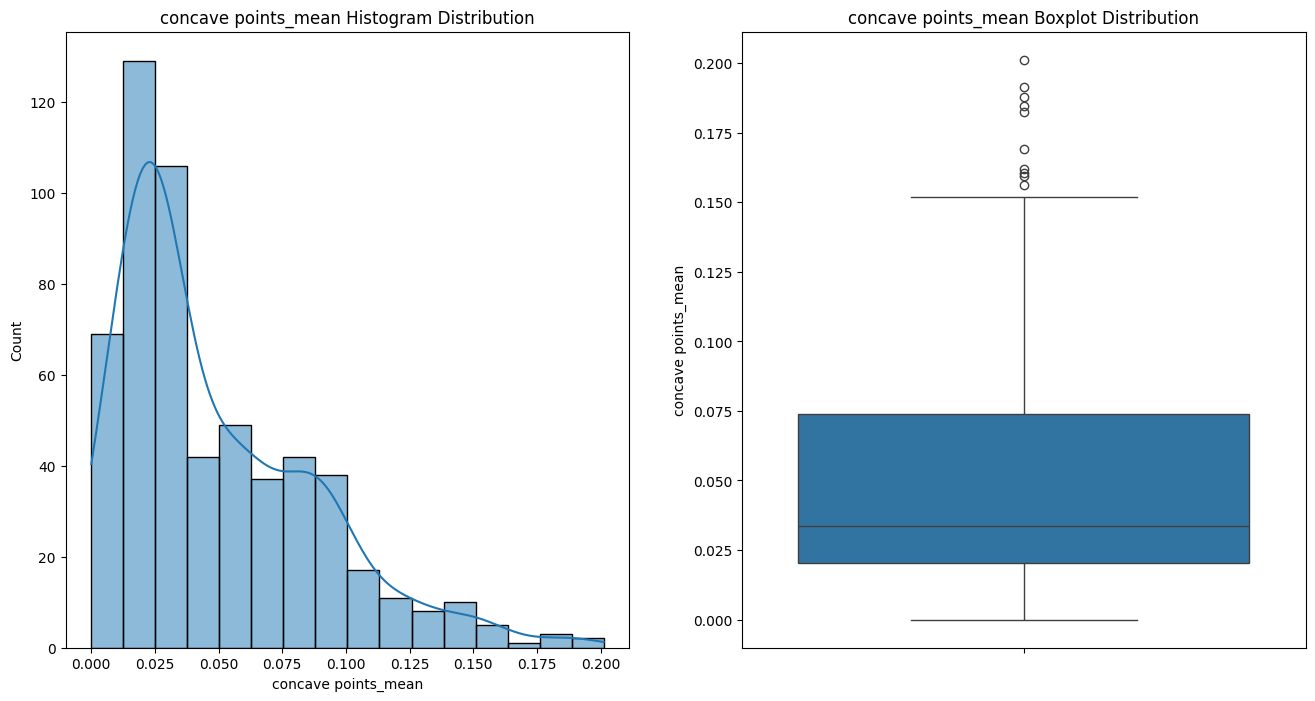

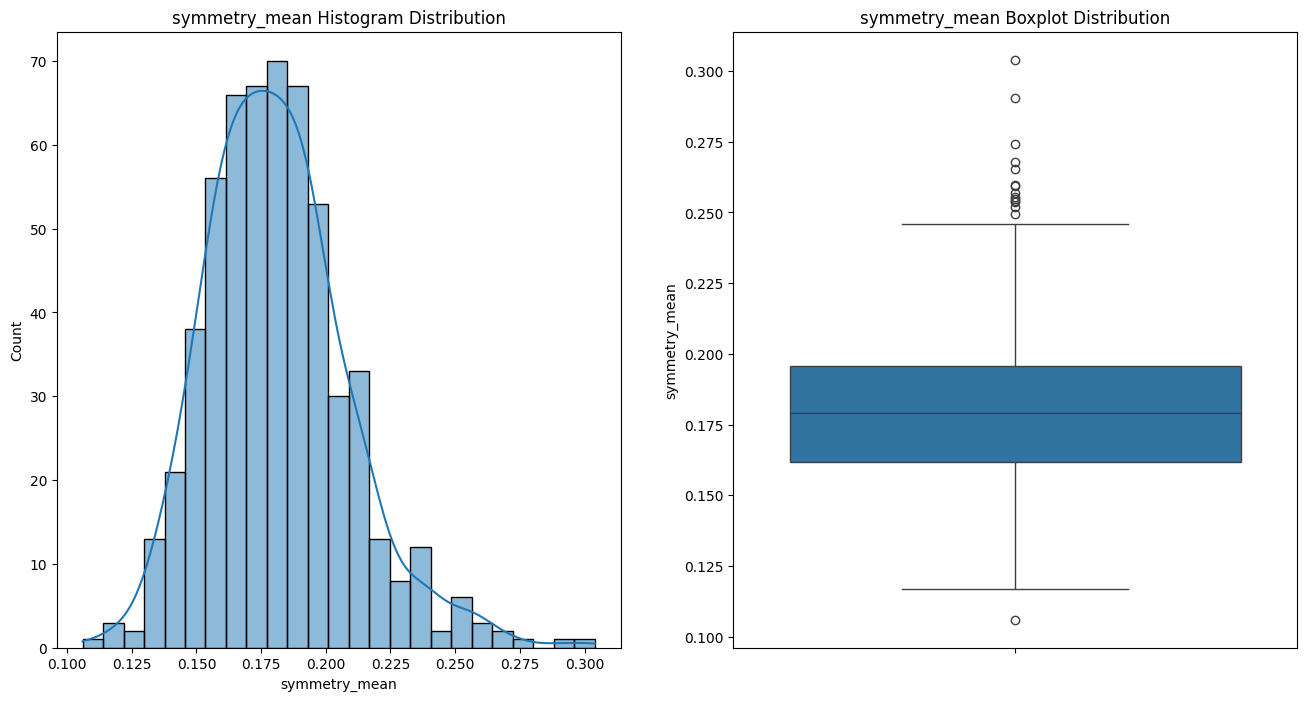

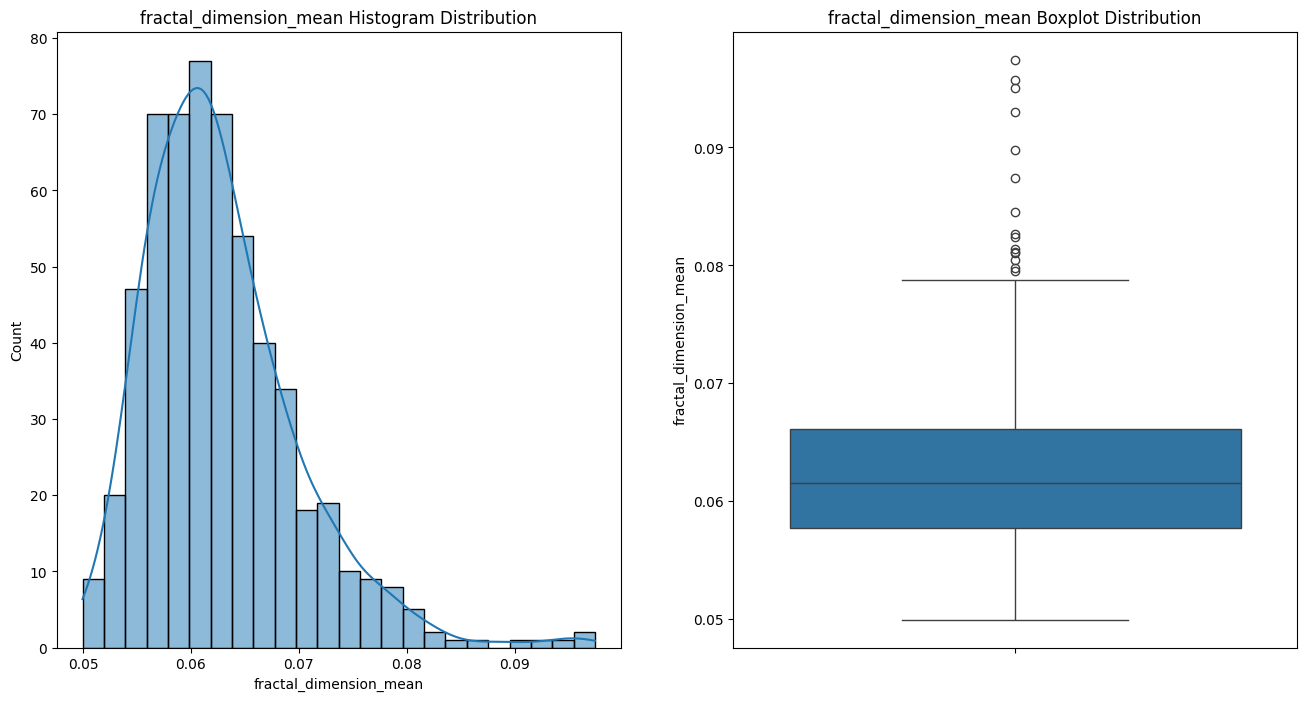

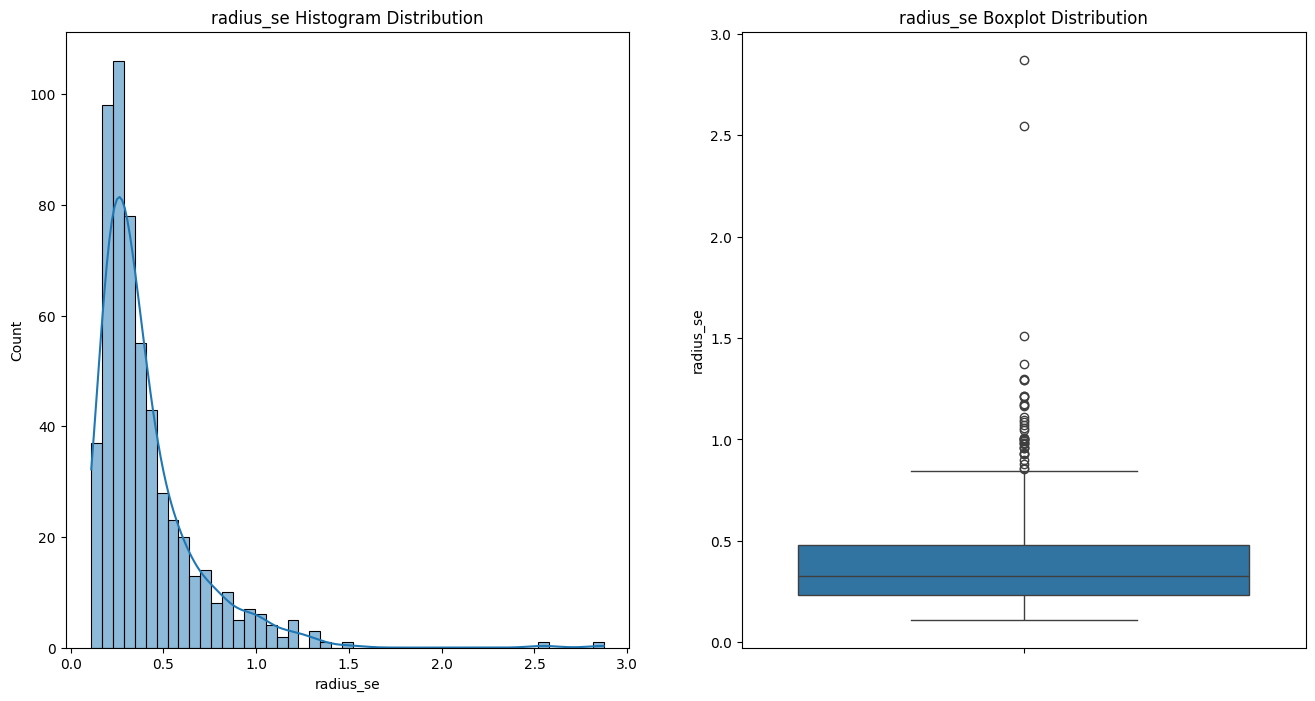

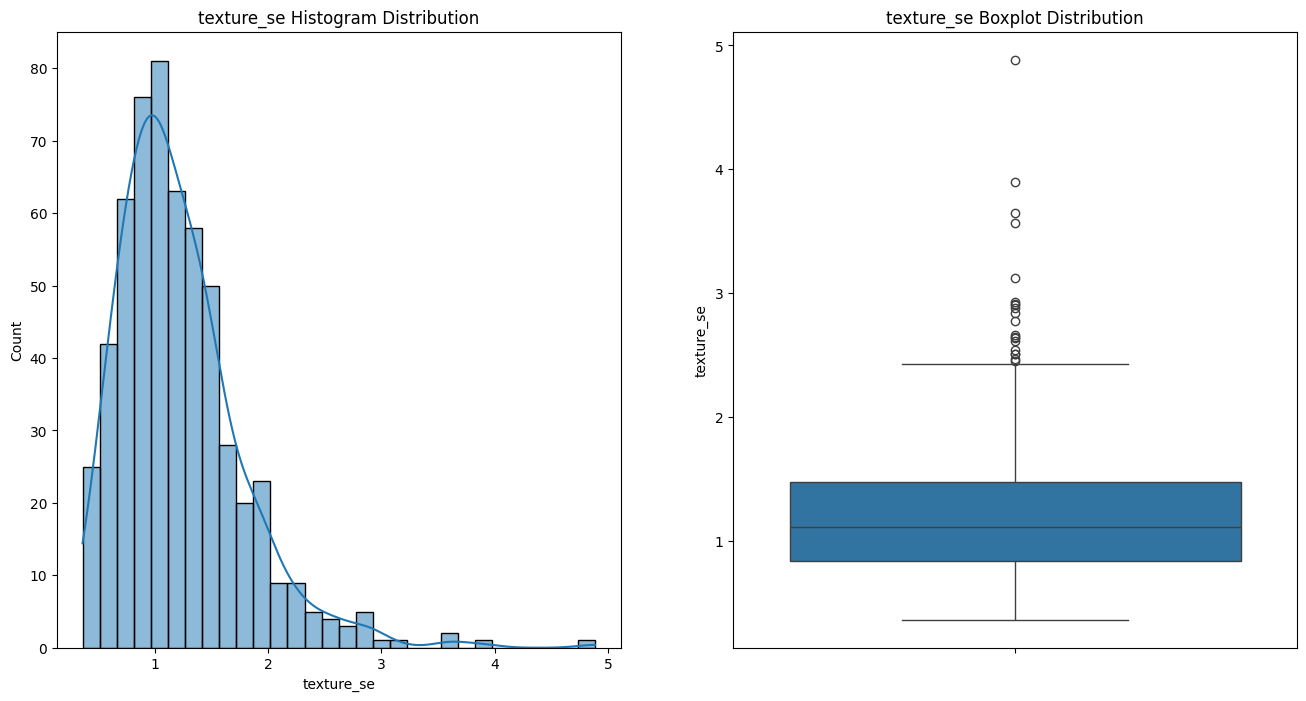

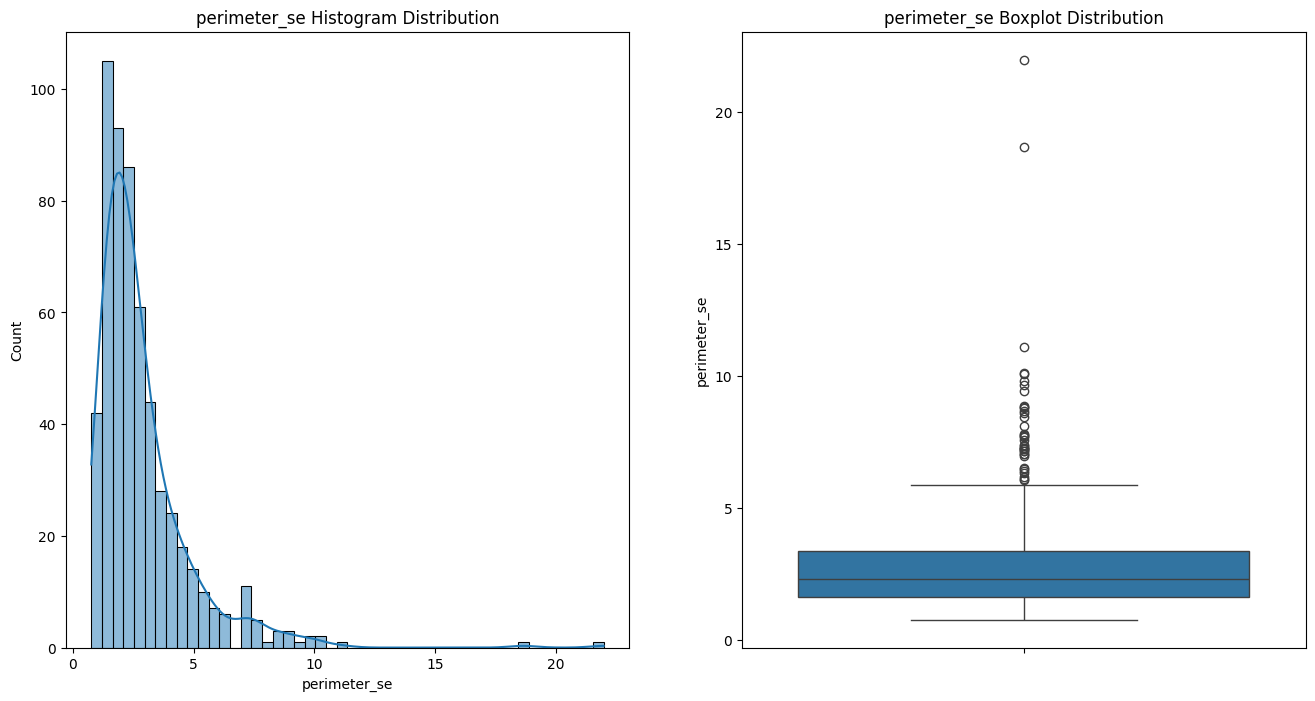

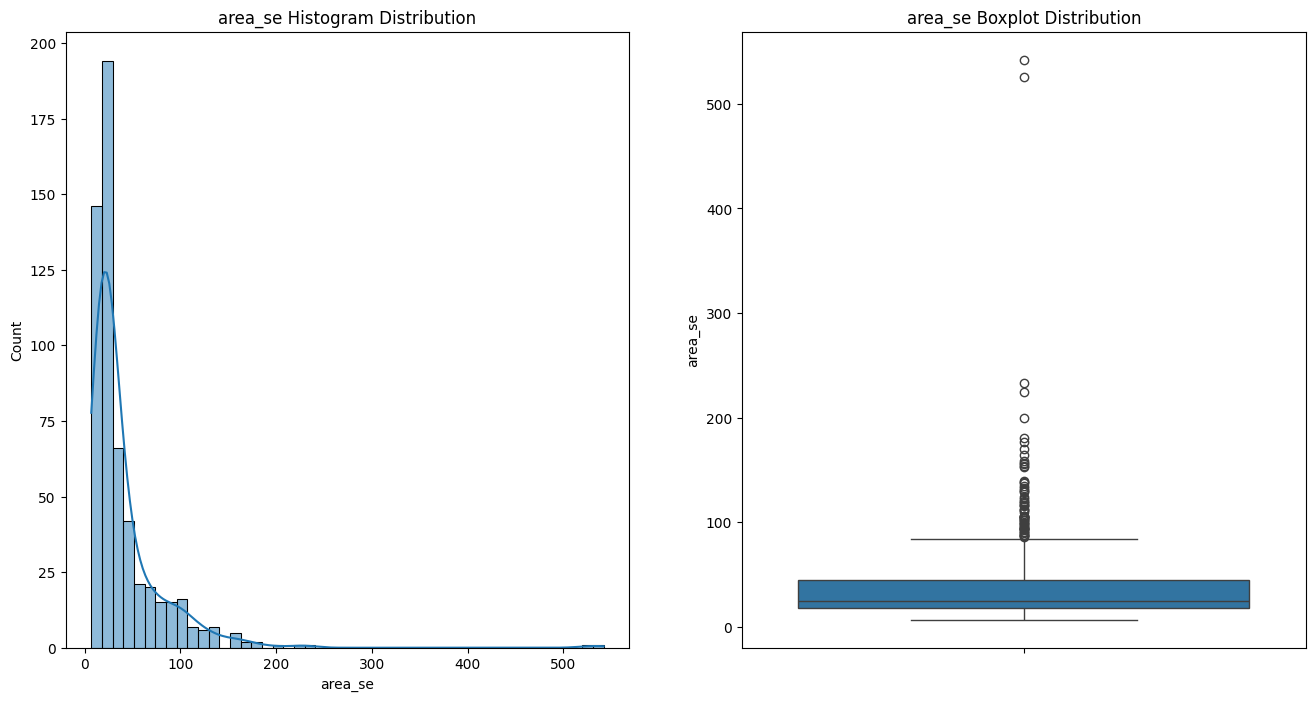

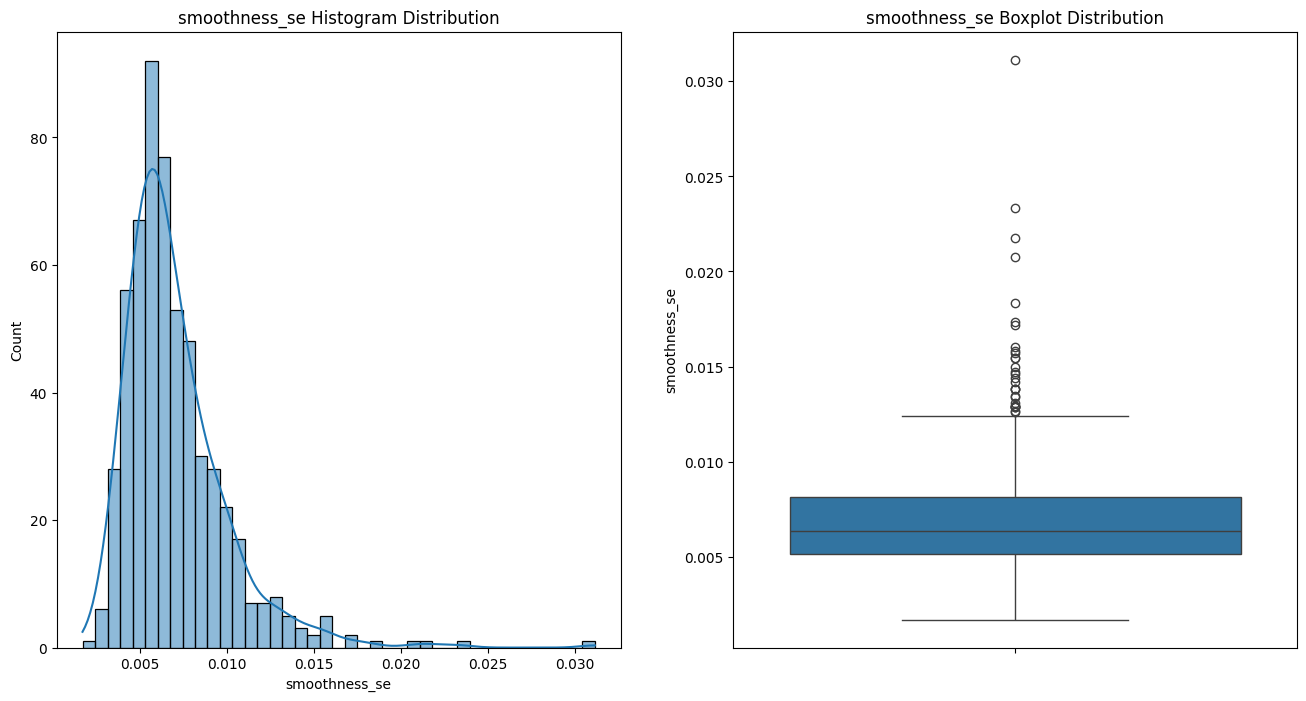

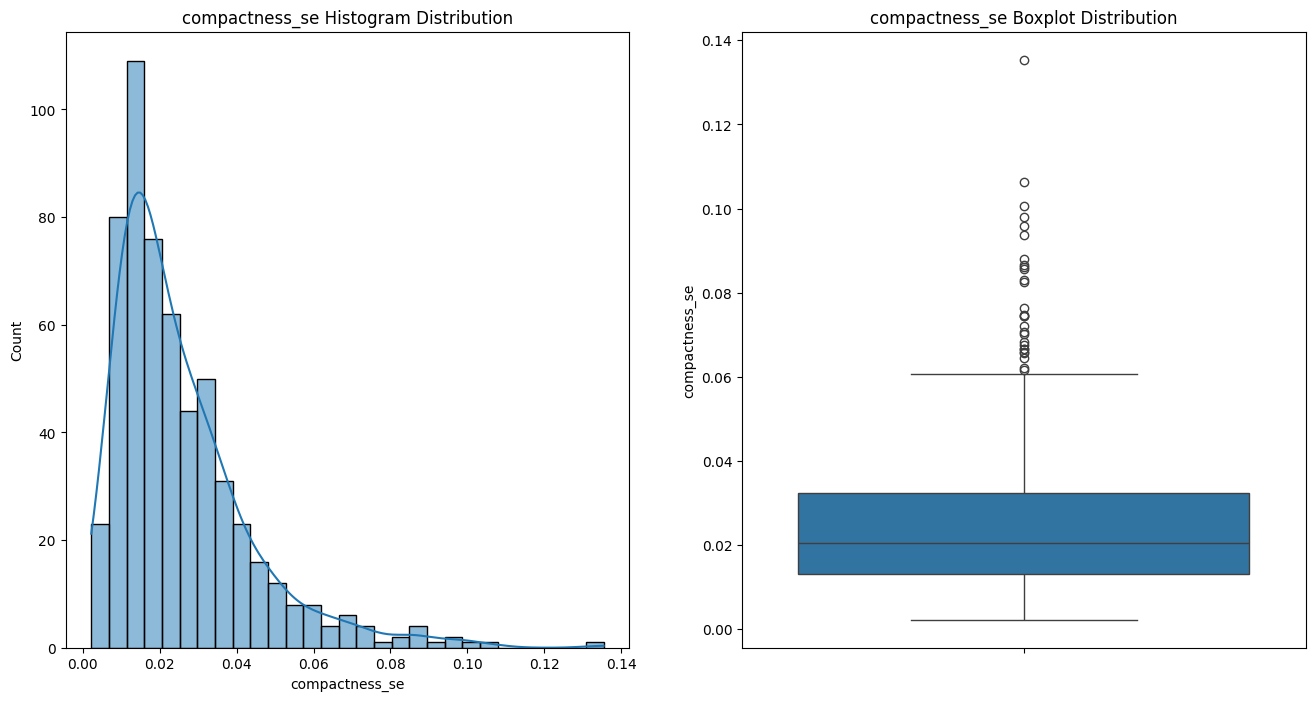

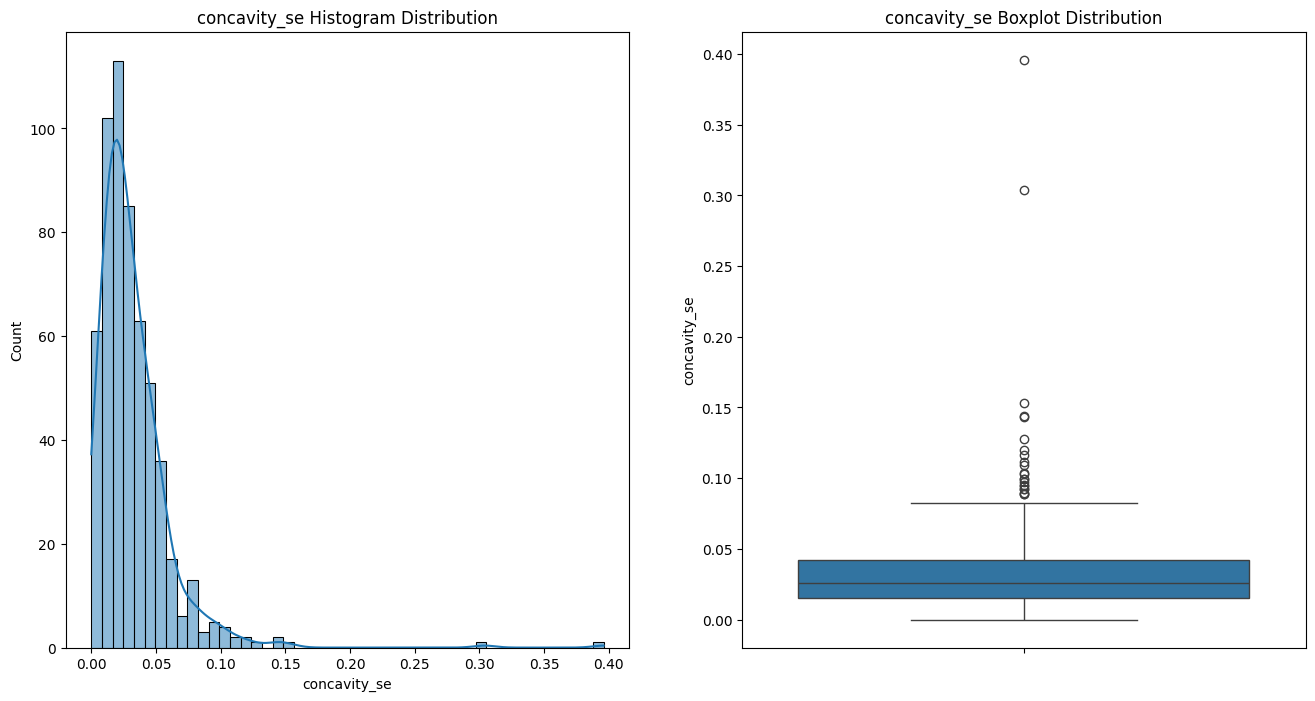

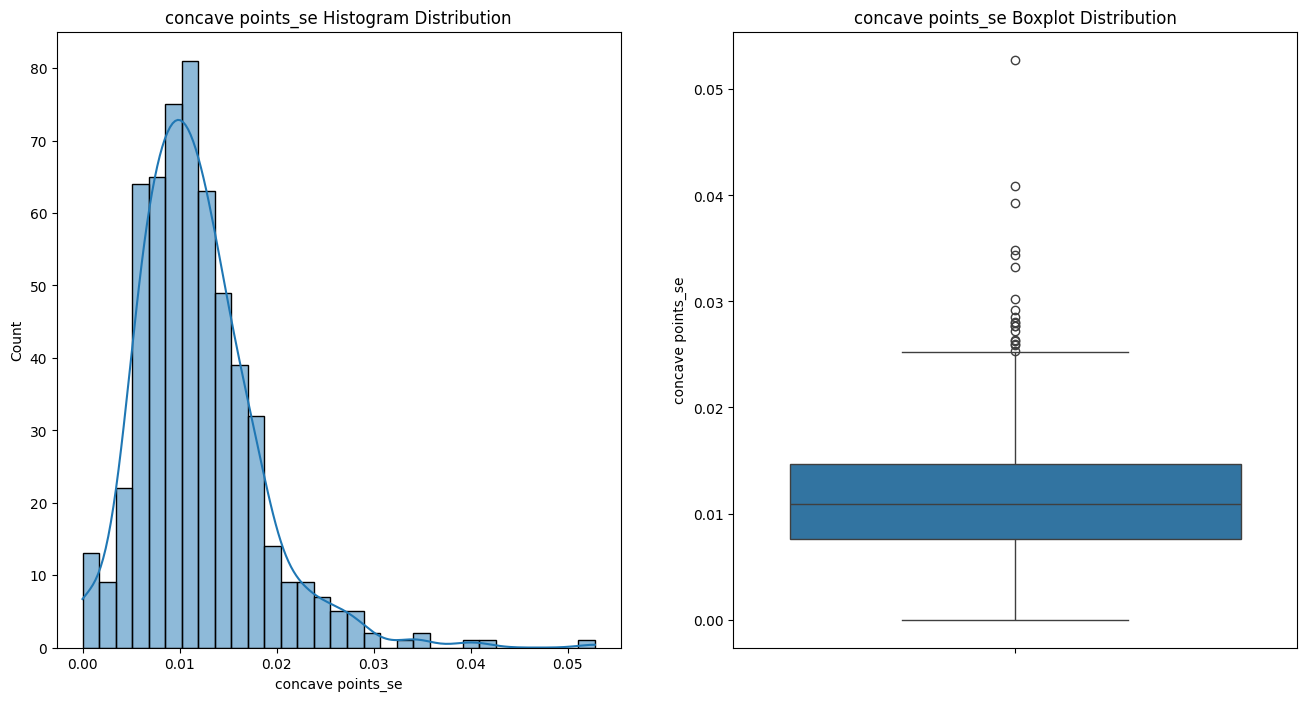

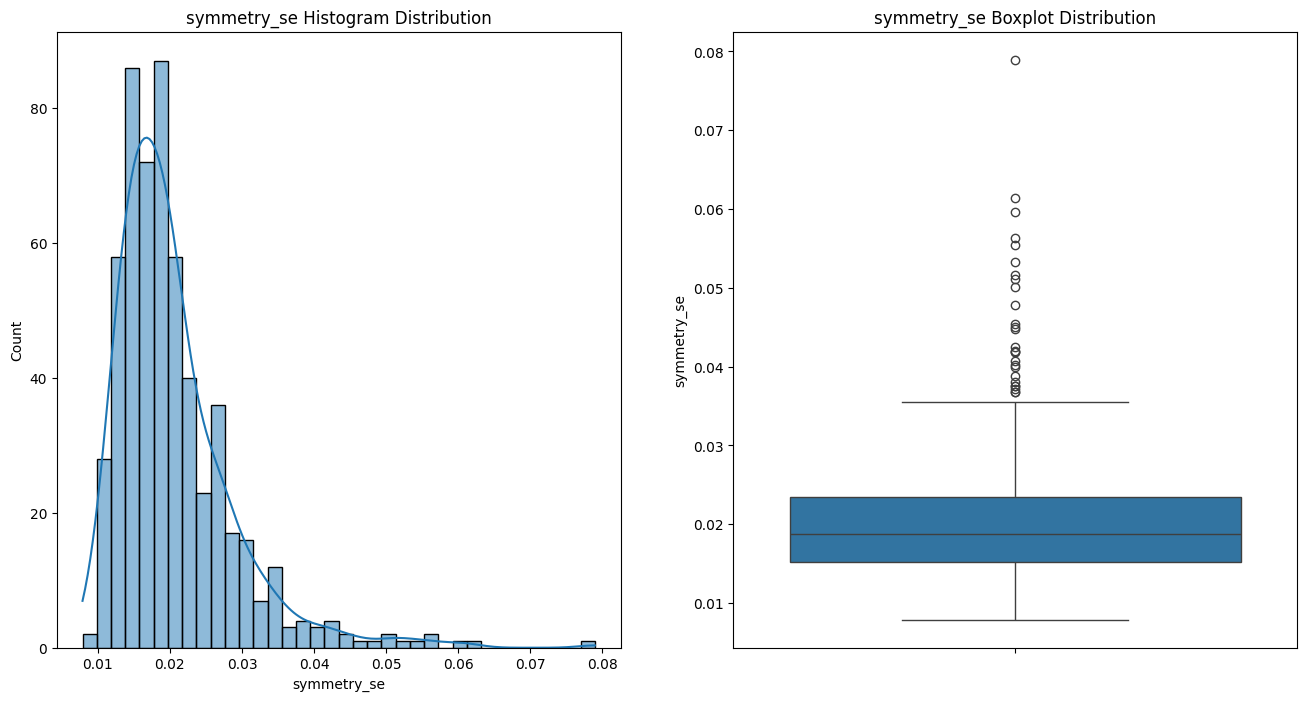

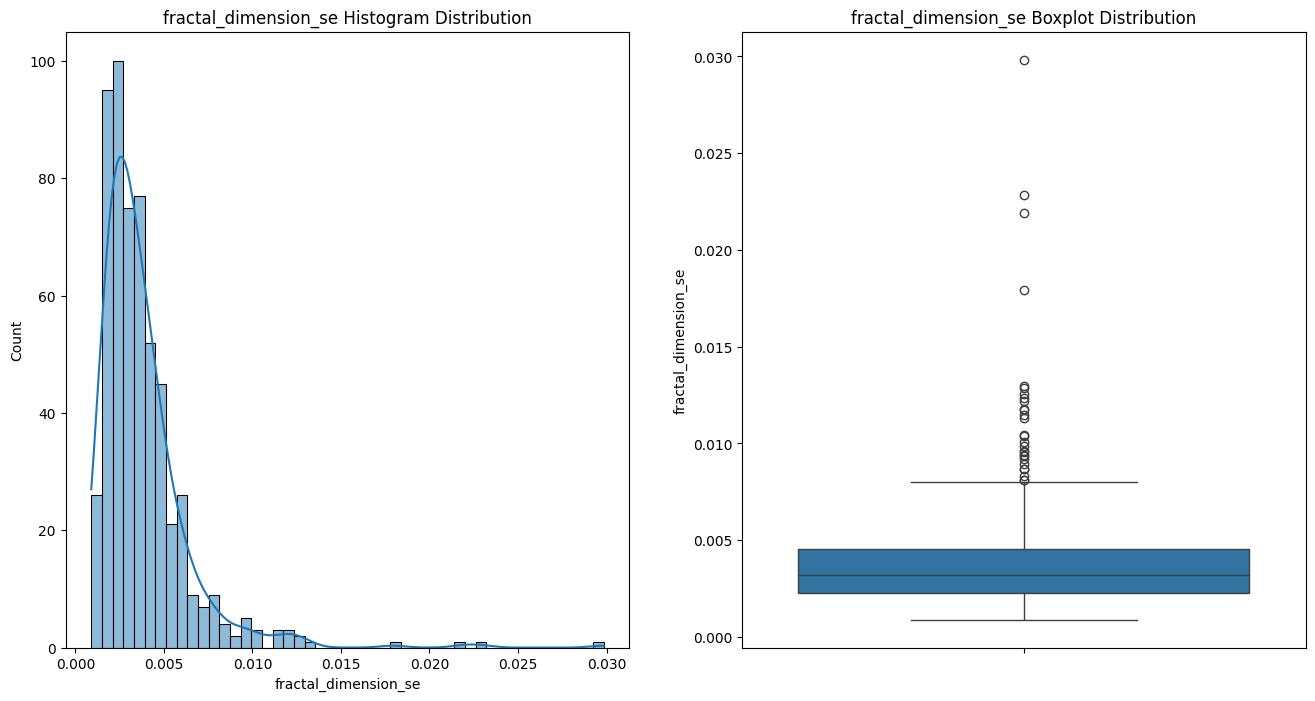

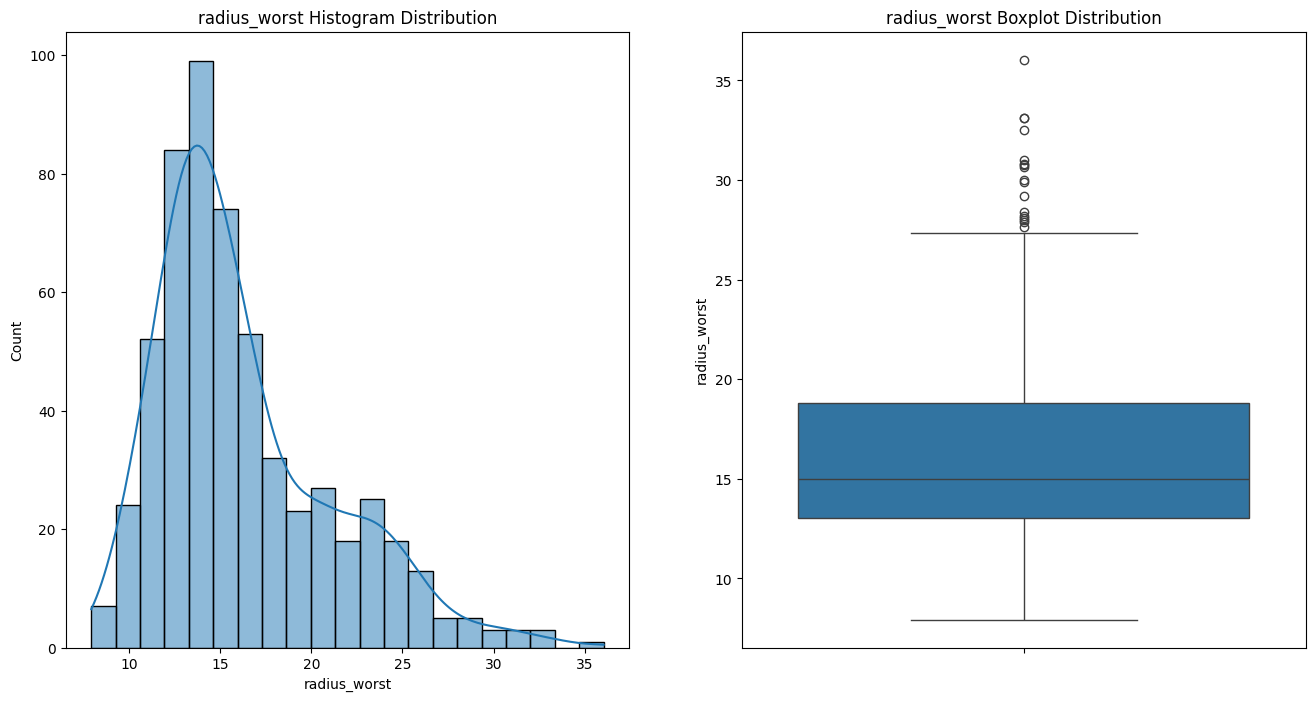

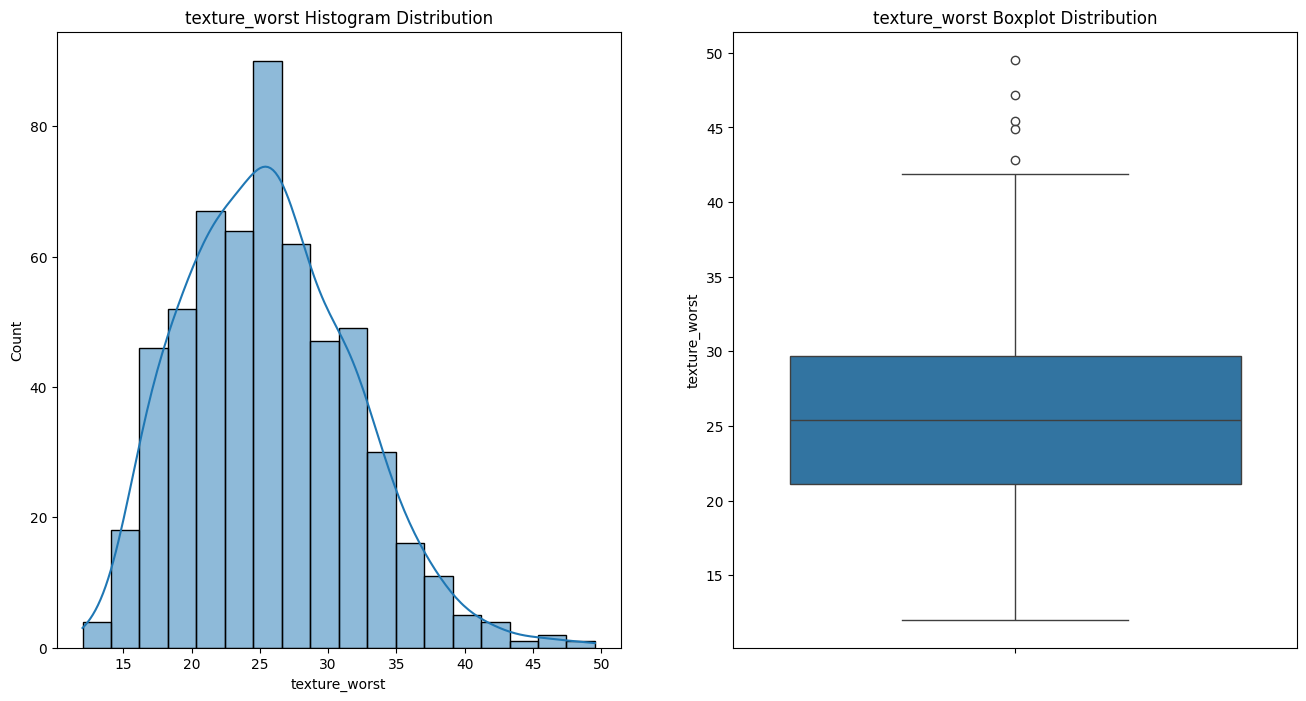

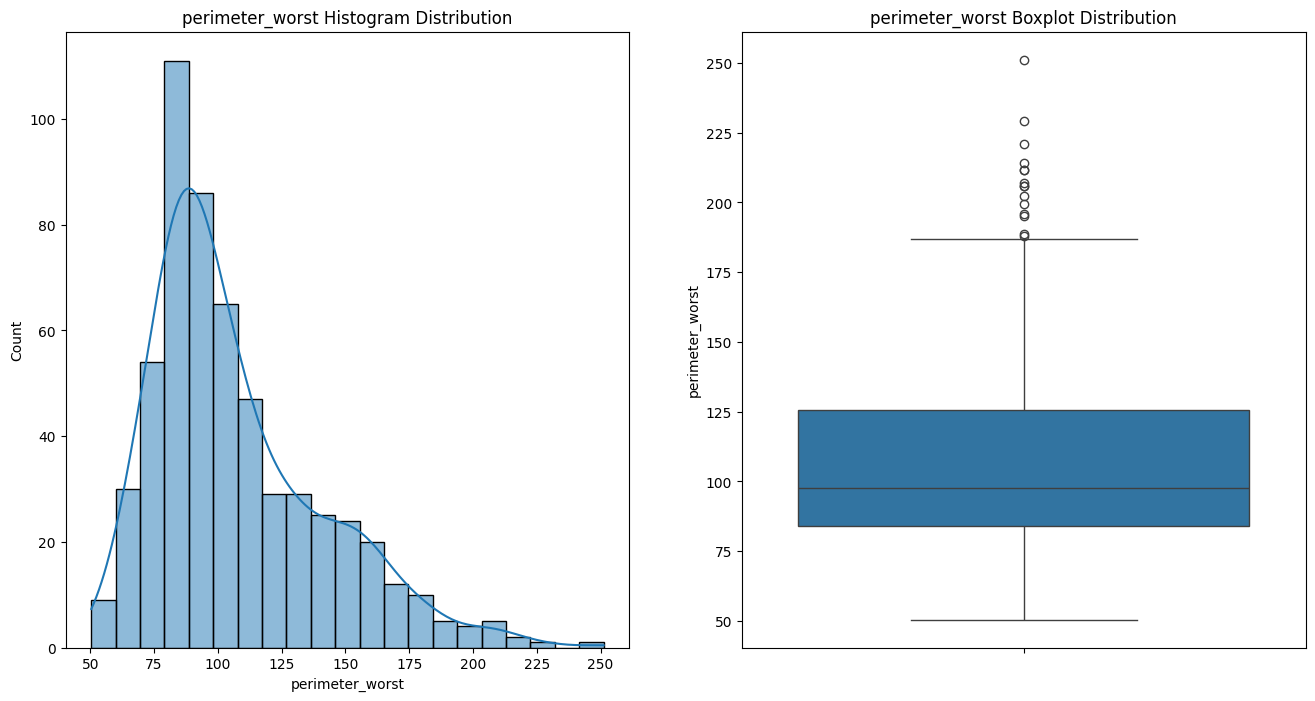

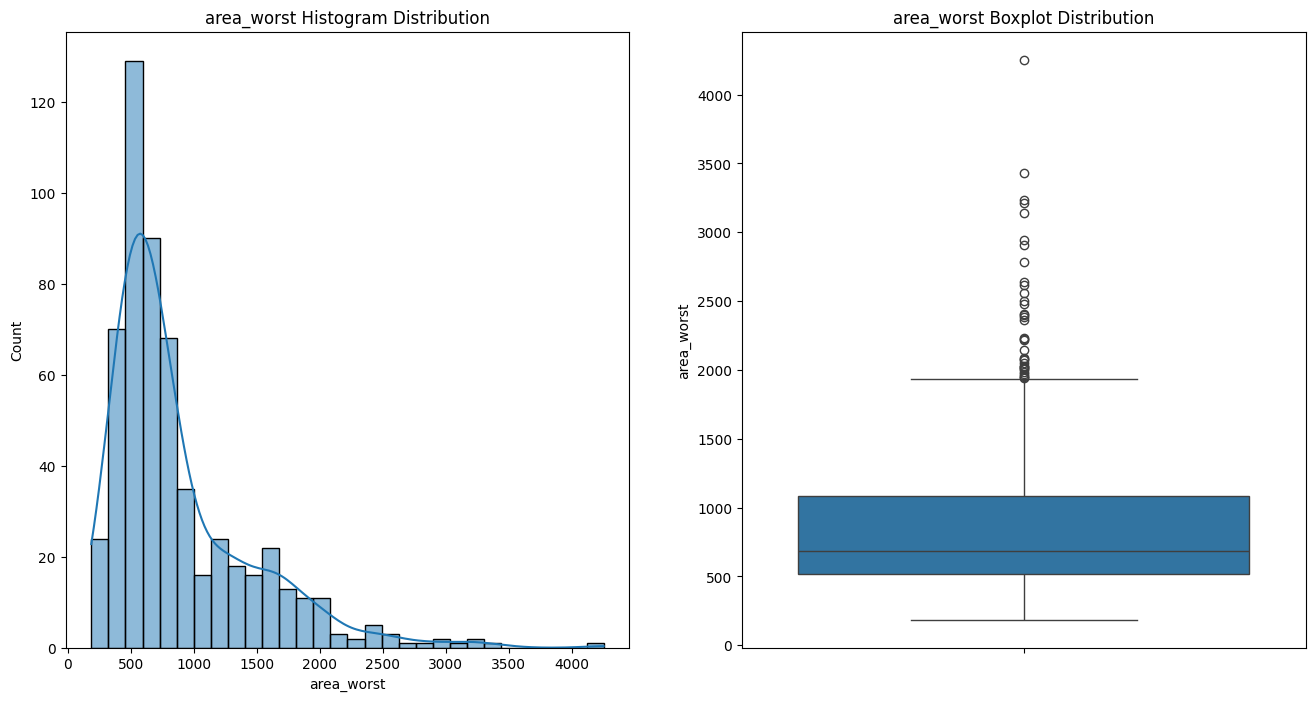

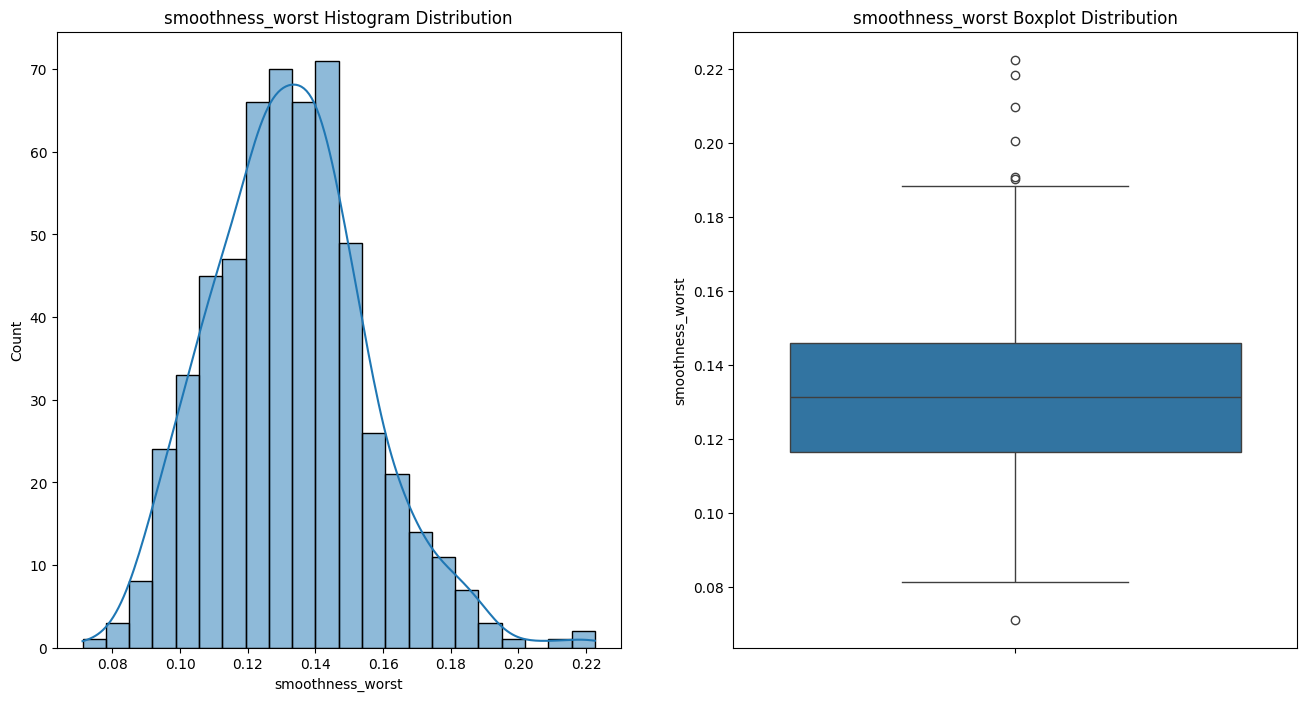

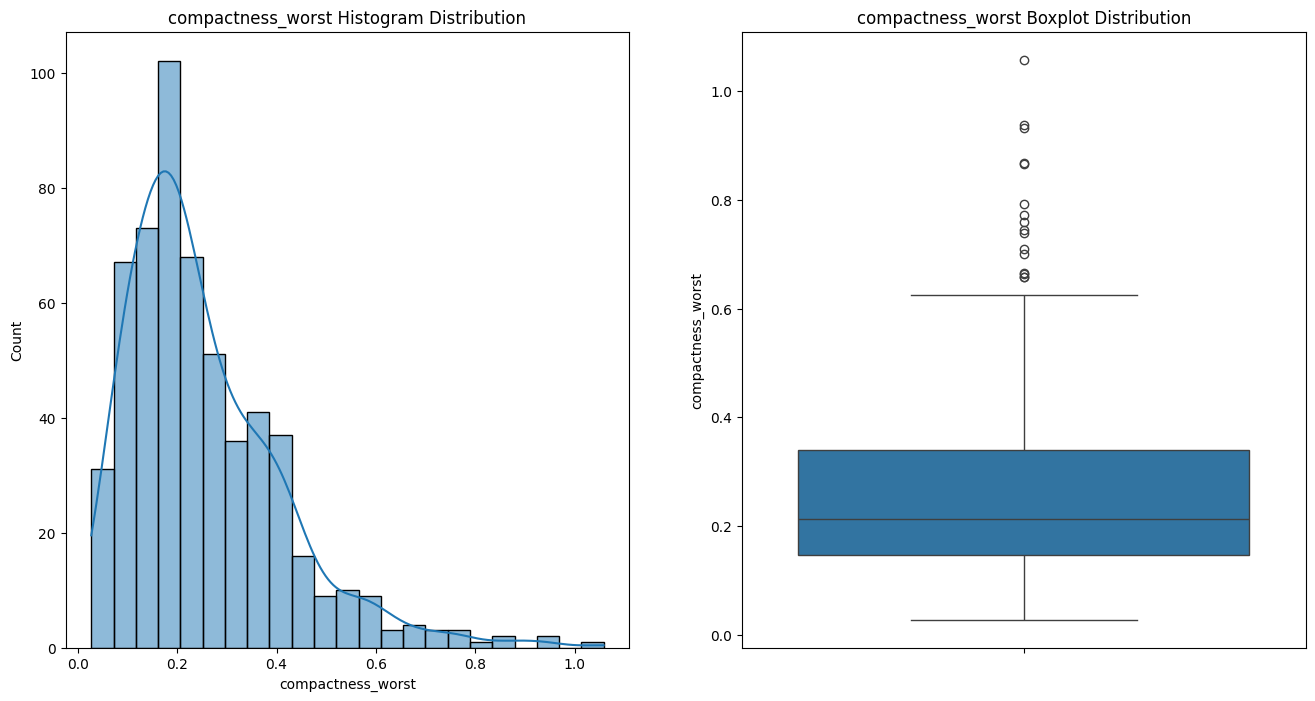

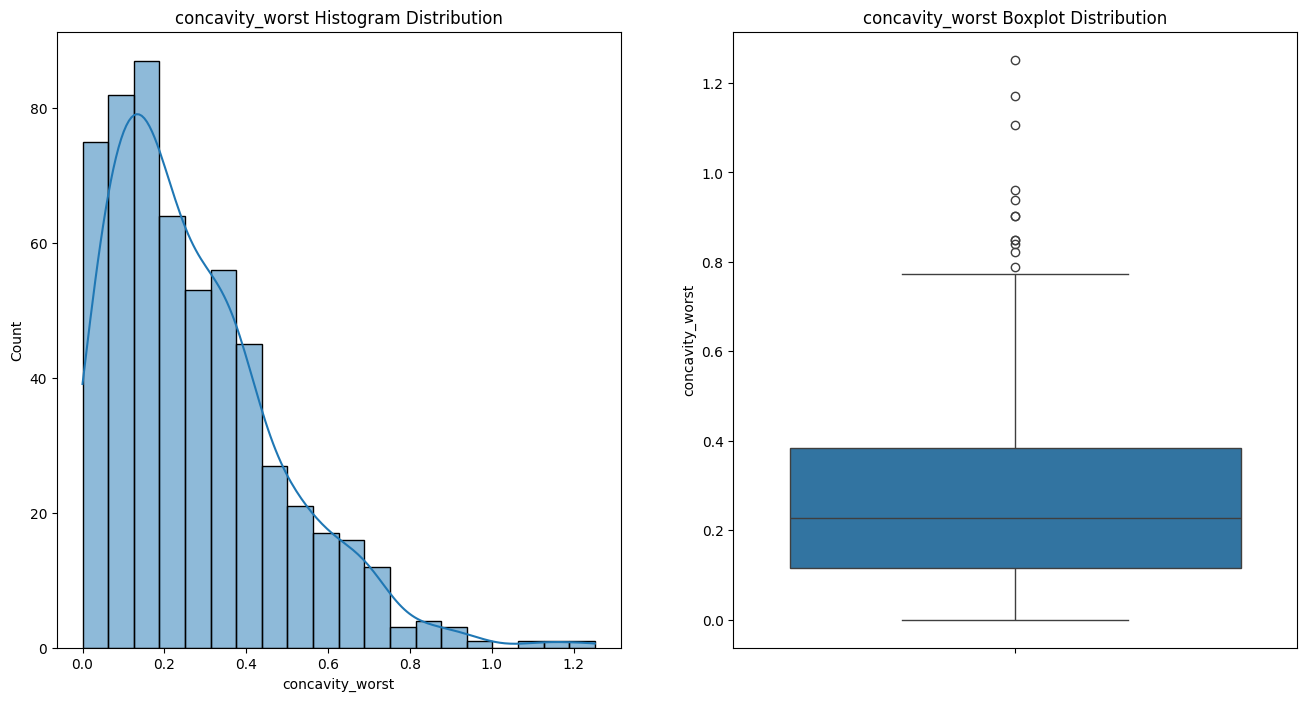

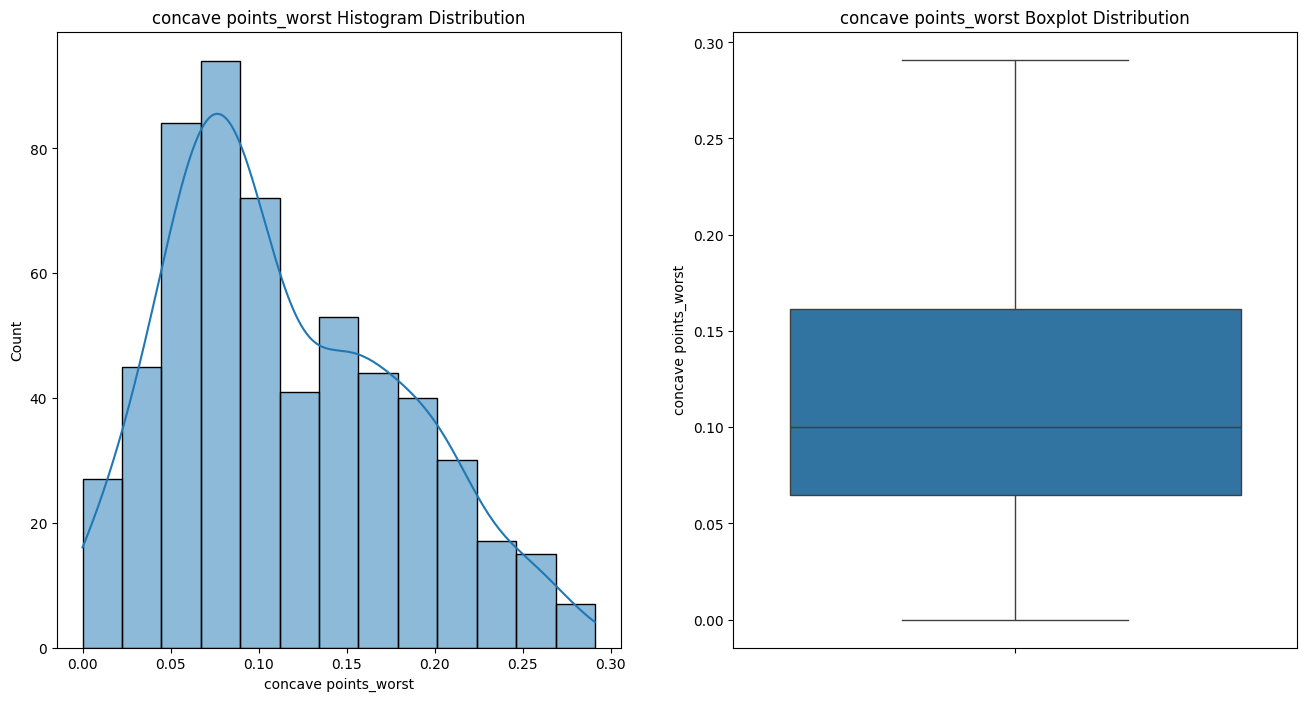

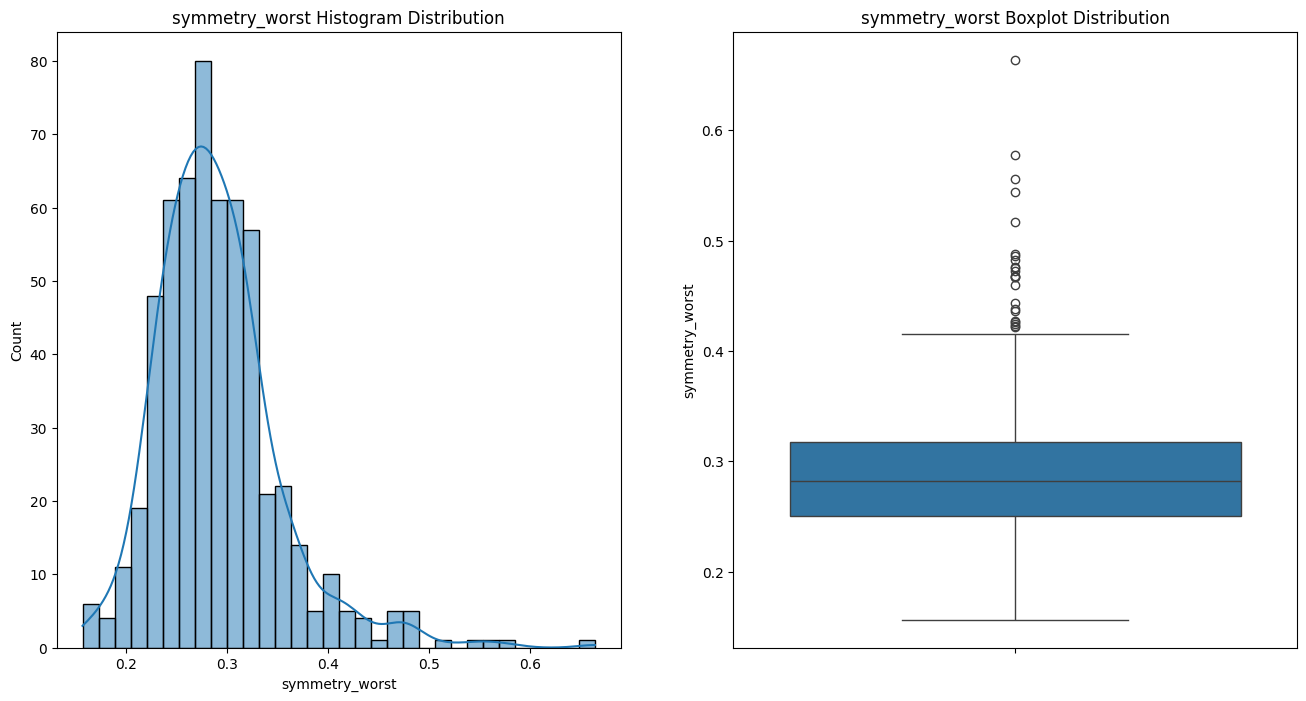

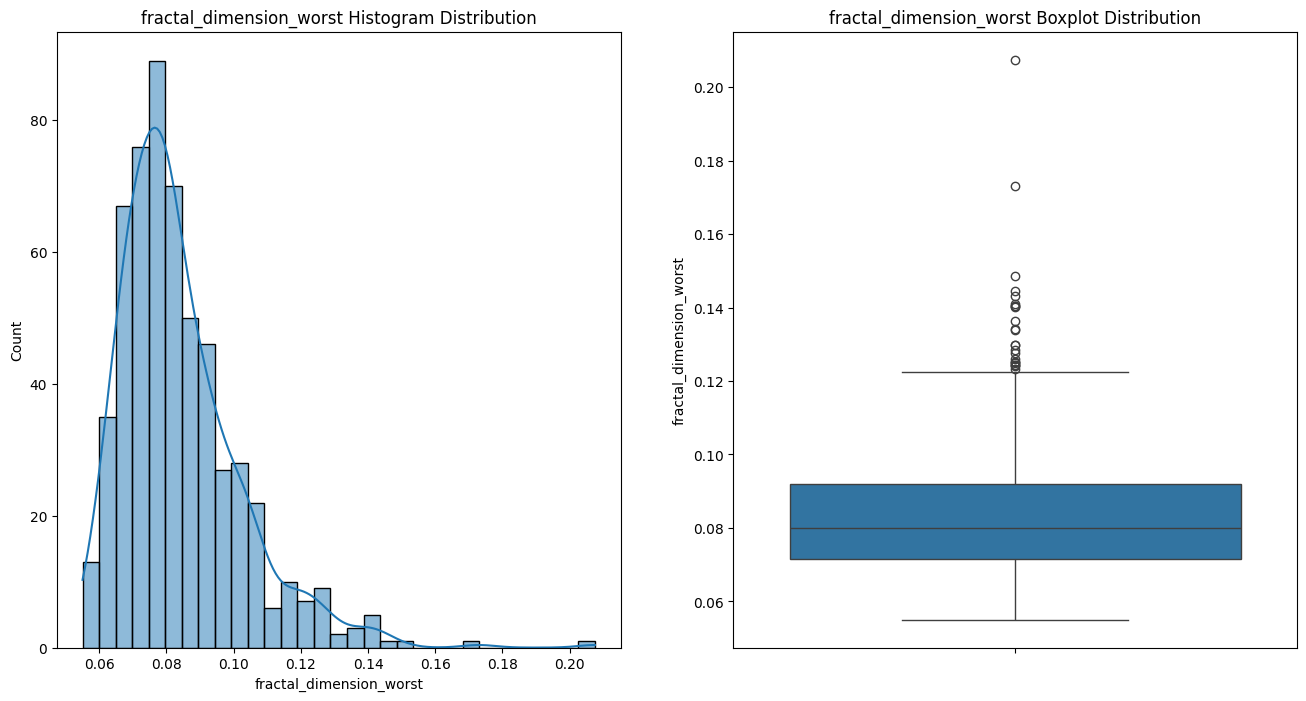

In [10]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"{col} Histogram Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"{col} Boxplot Distribution")

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [12]:
df_clean = df.drop(columns=['id'])
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### B.2 Mapping Label

In [13]:
diagnosis_mapping = {"B" : 0, "M" : 1}
df_clean['diagnosis_map'] = df_clean['diagnosis'].map(diagnosis_mapping)
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_map
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## C. Exploratory Data Analysis